In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('/media/premium/common-biscuit/main/planogram_biscuit/data/iou_json/packets_json/yolov5_medium_iou_file.json') as f:
	    iou_image_medium = json.load(f)

In [3]:
with open('/media/premium/common-biscuit/main/planogram_biscuit/data/iou_json/packets_json/iou_file.json') as f:
	    iou_image = json.load(f)

In [4]:
image_name = []
detection_scores = []
for key, value in iou_image.items():
    image_name.append(key)
    detection_scores.append(value['detection_score'])

df = pd.DataFrame({'image_name': image_name, 'detection_scores': detection_scores})
df.sort_values(by=['detection_scores'], inplace=True)
df.reset_index(drop=True,inplace=True)
df

,image_name,detection_scores
0,PHOTO-2021-07-26-09-43-37,0.000000
1,PHOTO-2021-07-24-15-30-52,0.434783
2,PHOTO-2021-07-26-14-05-57,0.666667
3,PHOTO-2021-07-26-13-13-54,0.707692
4,PHOTO-2021-07-21-08-13-01,0.719101
...,...,...
152,PHOTO-2021-07-21-08-38-26,0.990909
153,PHOTO-2021-07-21-08-05-38,1.004608
154,PHOTO-2021-07-27-12-18-17,1.008929
155,PHOTO-2021-07-26-15-35-14,1.011765


In [5]:
image_name = []
detection_scores = []
for key, value in iou_image_medium.items():
    image_name.append(key)
    detection_scores.append(value['detection_score'])

df_medium = pd.DataFrame({'image_name': image_name, 'detection_scores': detection_scores})
df_medium.sort_values(by=['detection_scores'], inplace=True)
df_medium.reset_index(drop=True,inplace=True)
df_medium

,image_name,detection_scores
0,PHOTO-2021-07-26-09-43-37,0.000000
1,PHOTO-2021-07-24-15-30-52,0.500000
2,PHOTO-2021-07-21-08-35-00,0.705882
3,PHOTO-2021-07-26-11-31-09,0.765343
4,PHOTO-2021-07-24-12-00-38,0.769231
...,...,...
152,PHOTO-2021-07-26-15-35-14,0.987952
153,PHOTO-2021-07-26-15-29-25,1.000000
154,PHOTO-2021-07-24-13-16-37,1.003509
155,PHOTO-2021-07-21-09-17-10 2,1.004785


In [6]:
#df.to_csv('/media/premium/common-biscuit/main/planogram_biscuit/data/raw/csvs/yolov5_medium_packets_score.csv')

In [9]:
iou_scores_all = []
for key, value in iou_image.items():
    iou_scores_all.extend(value['best_iou'])

df_ious = pd.DataFrame({'packets_ious': iou_scores_all})
df_ious.sort_values(by=['packets_ious'], inplace=True)
df_ious.reset_index(drop=True,inplace=True)
df_ious

,packets_ious
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
12076,0.990000
12077,0.990291
12078,0.990385
12079,0.990826


In [10]:
iou_scores_all = []
for key, value in iou_image_medium.items():
    iou_scores_all.extend(value['best_iou'])

df_ious_medium = pd.DataFrame({'packets_ious': iou_scores_all})
df_ious_medium.sort_values(by=['packets_ious'], inplace=True)
df_ious_medium.reset_index(drop=True,inplace=True)
df_ious_medium

,packets_ious
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
12076,0.990099
12077,0.991736
12078,0.994048
12079,0.994083


## Distribution Plot

/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


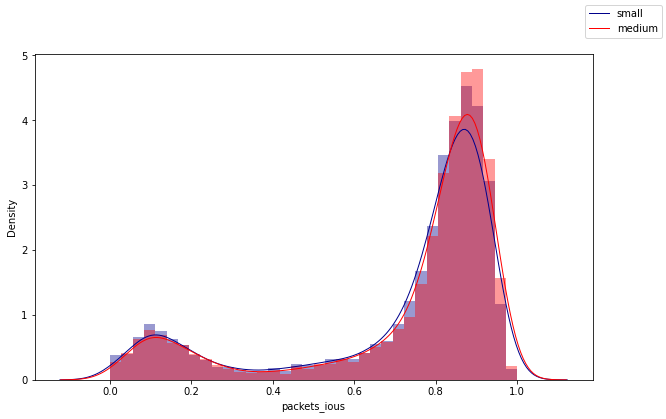

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sns.distplot(df_ious['packets_ious'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1})
sns.distplot(df_ious_medium['packets_ious'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             kde_kws={'linewidth': 1})
fig.legend(labels=['small','medium'])
plt.show()

/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


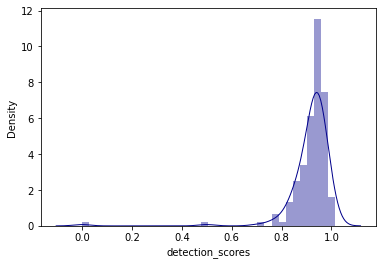

In [9]:
import seaborn as sns
sns_plot = sns.distplot(df['detection_scores'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 1})
#sns_plot.figure.savefig("/media/premium/common-biscuit/main/planogram_biscuit/data/yolov5_medium_packets_score_distribution.png")

/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


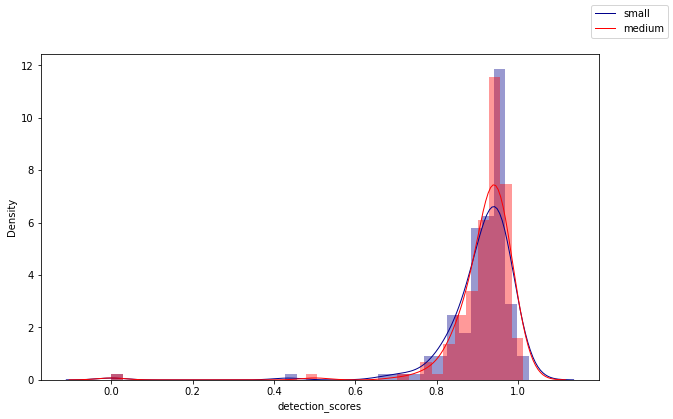

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sns.distplot(df['detection_scores'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1})
sns.distplot(df_medium['detection_scores'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             kde_kws={'linewidth': 1})
fig.legend(labels=['small','medium'])
plt.show()